# Učitavanje biblioteka

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Preprocesuiranje podataka

Preprocesurianje podataka se svodi na nekoliko koraka:

1. Balansiranje podataka. (Undersampling)
2. Kodiranje string vrednosti. (LabelEncoding)
3. Skaliranje podataka.
4. Split podataka na trening i test set.

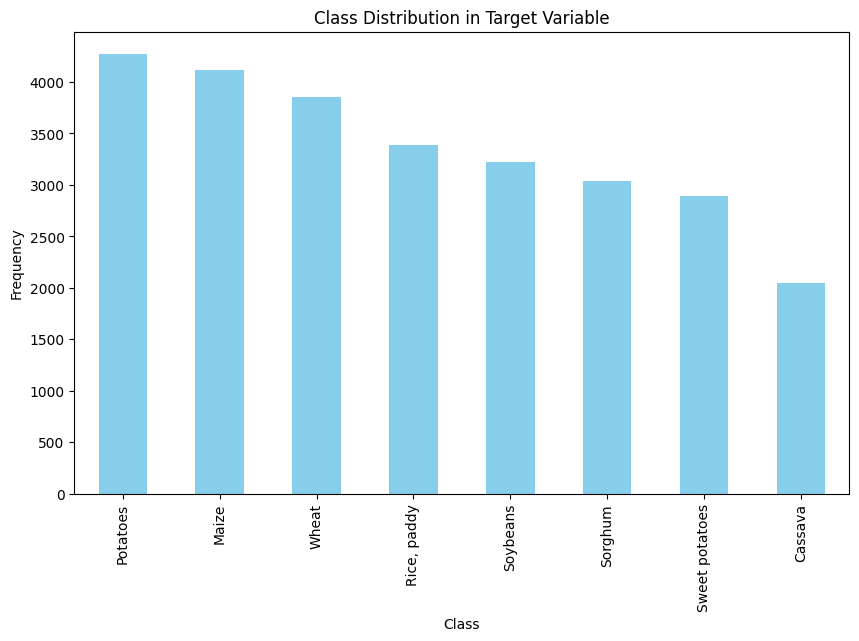

In [27]:
#Import the dataset
df = pd.read_csv('datasets/yield_df.csv')
df = df.drop(columns=['Year','Unnamed: 0'])

# Remove mintority 'Item' classes
df = df[df['Item'] != 'Yams']
df = df[df['Item'] != 'Plantains and others']

# Visualize class distribution
target_counts = df['Item'].value_counts()

plt.figure(figsize=(10, 6))
target_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution in Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [28]:
#Import the dataset
df = pd.read_csv('datasets/yield_df.csv')
df = df.drop(columns=['Year','Unnamed: 0'])

# Remove mintority 'Item' classes
df = df[df['Item'] != 'Yams']
df = df[df['Item'] != 'Plantains and others']

# Encode categorical variables
label_encoders = {}
for col in ['Area', 'Item']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encode categorical variables
label_encoder = LabelEncoder()

df['Area'] = label_encoder.fit_transform(df['Area'])
df['Item'] = label_encoder.fit_transform(df['Item'])

# Define features (X) and target (y)
X = df.drop(columns=['Item'])
y = df['Item']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state=37)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treniranje razlicitih modela

Treniranje je rađeno sa nekoliko različitih klasifikacionih algoritama. Na osnovu uvida pri treniranju regresionih algoritama je ustanovljena jasna korelacija između tipa useva i količine, samim tim za rad su uzeti algoritmi: 

- Random Forest Classifier
- Logistic Regression Classifier
- Support Vector Machine Classifier

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       741
           1       0.79      0.78      0.78      1466
           2       0.92      0.93      0.93      1616
           3       0.80      0.81      0.81      1230
           4       0.76      0.76      0.76      1154
           5       0.83      0.83      0.83      1217
           6       0.87      0.87      0.87      1050
           7       0.81      0.81      0.81      1457

    accuracy                           0.83      9931
   macro avg       0.83      0.83      0.83      9931
weighted avg       0.83      0.83      0.83      9931



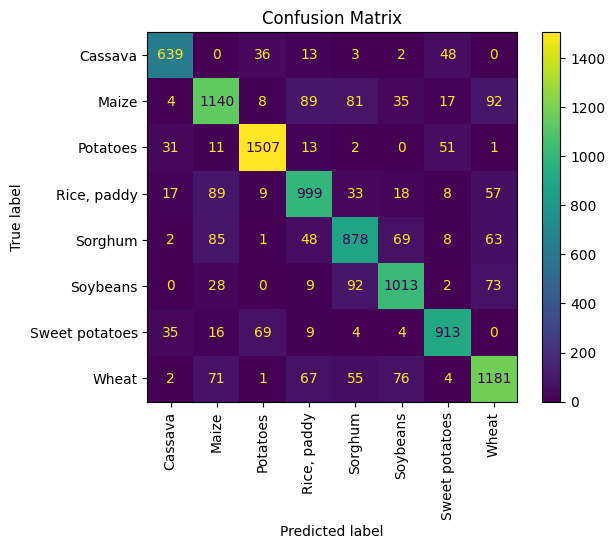

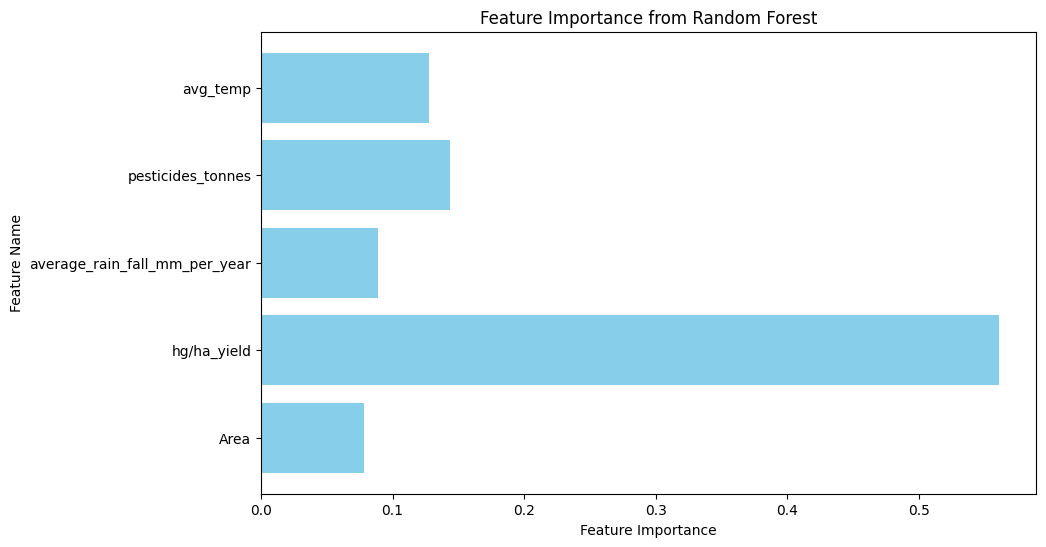

In [29]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders['Item'].classes_)
cmd.plot(cmap='viridis', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance Visualization
importances = clf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance from Random Forest')
plt.show()

              precision    recall  f1-score   support

           0       0.35      0.22      0.27       741
           1       0.23      0.31      0.27      1466
           2       0.64      0.74      0.69      1616
           3       0.39      0.26      0.31      1230
           4       0.29      0.26      0.27      1154
           5       0.34      0.46      0.39      1217
           6       0.49      0.43      0.46      1050
           7       0.32      0.27      0.29      1457

    accuracy                           0.39      9931
   macro avg       0.38      0.37      0.37      9931
weighted avg       0.39      0.39      0.38      9931



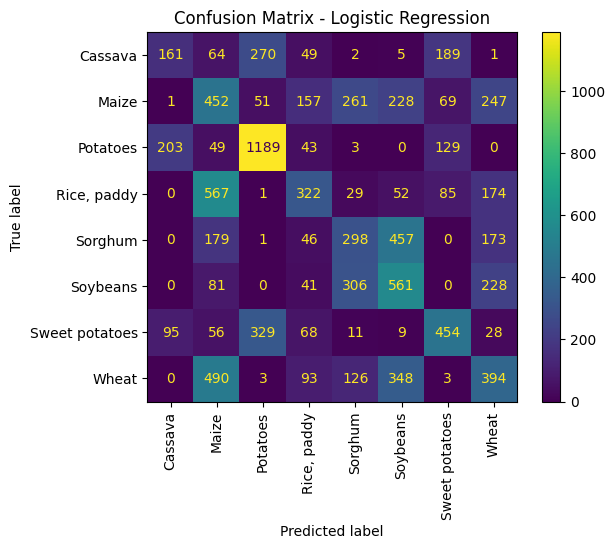

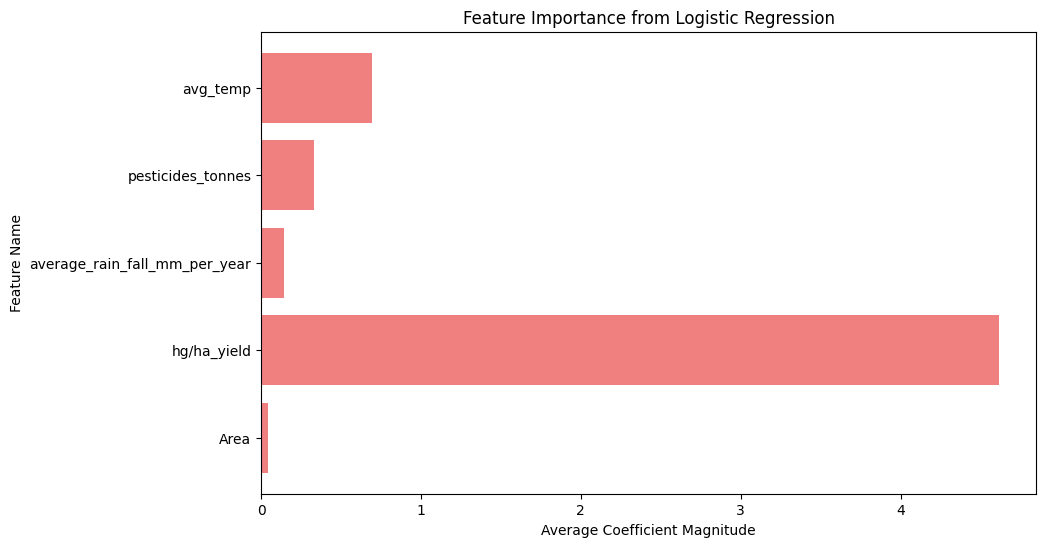

In [30]:
# Train a Logistic Regression Classifier
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders['Item'].classes_)
cmd.plot(cmap='viridis', xticks_rotation='vertical')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Feature Importance Visualization for Logistic Regression (coefficients)
coefs = np.abs(clf.coef_).mean(axis=0)
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefs, color='lightcoral')
plt.xlabel('Average Coefficient Magnitude')
plt.ylabel('Feature Name')
plt.title('Feature Importance from Logistic Regression')
plt.show()

Support Vector Machine:
              precision    recall  f1-score   support

           0       0.33      0.18      0.24       741
           1       0.24      0.37      0.29      1466
           2       0.65      0.75      0.69      1616
           3       0.39      0.29      0.33      1230
           4       0.31      0.33      0.32      1154
           5       0.33      0.36      0.35      1217
           6       0.52      0.42      0.46      1050
           7       0.36      0.25      0.29      1457

    accuracy                           0.39      9931
   macro avg       0.39      0.37      0.37      9931
weighted avg       0.40      0.39      0.39      9931



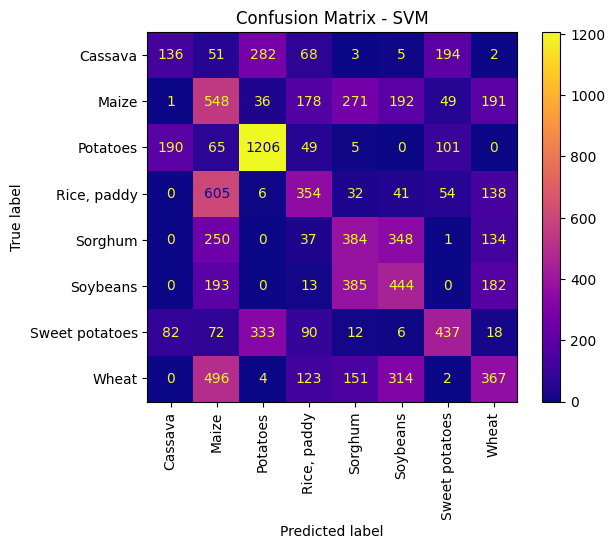

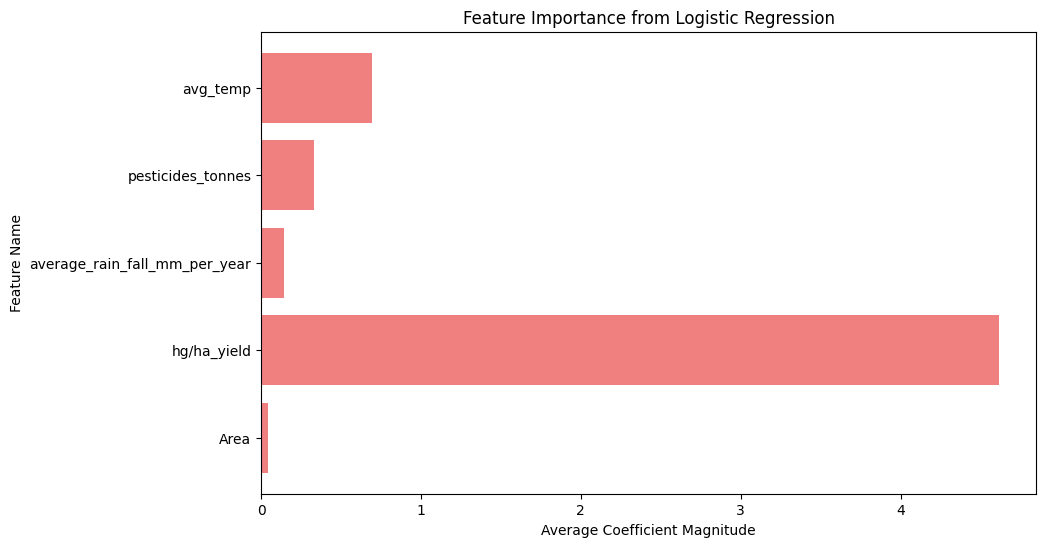

In [31]:
# Train a Support Vector Machine (SVM) Classifier
clf_svm = SVC(kernel='linear', random_state=37)
clf_svm.fit(X_train, y_train)

# Make predictions using SVM
y_pred_svm = clf_svm.predict(X_test)

# Evaluate the SVM model
print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))

# Plot the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=clf_svm.classes_)
cmd_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=label_encoders['Item'].classes_)
cmd_svm.plot(cmap='plasma', xticks_rotation='vertical')
plt.title('Confusion Matrix - SVM')
plt.show()

# Feature Importance Visualization for Logistic Regression (coefficients)
coefs = np.abs(clf.coef_).mean(axis=0)
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefs, color='lightcoral')
plt.xlabel('Average Coefficient Magnitude')
plt.ylabel('Feature Name')
plt.title('Feature Importance from Logistic Regression')
plt.show()
